# Домашнее задание - 3.

## Часть 1. Теория (5 баллов + бонус).

**Задание 1.** Найдите SVD-разложение матриц (каждый пункт - **0.5 балла**):
![задание 1](task1.png)

**Задание 2. (2 балла)** Изучите материалы про QR, LU, SVD и спектральное разложение матриц. Напишите формулу для одного любого разложения (кроме SVD), поясните её, объясните геометрический смысл разложения и его связь с SVD.

**Бонус.** За самостоятельную реализацию алгоритма, осуществляющего выбранное вами разложение в python - **до +3 баллов**.

**Задание 3. (1 балл)** Некто придумал метод __бесполезных компонент__. Как и в методе главных компонент, новые признаки являются линейными комбинациями исходных. Бесполезные компоненты так же, как и главные - ортогональны между собой и имеют длину 1. В отличие от метода главных компонент, проекция на первую бесполезную компоненту обладает __наименьшей__ дисперсией. Вторая бесполезная компонента ортогональна первой и обладает наименьшей дисперсией при условии ортогональности. И так далее.

Как связаны метод бесполезных компонент и метод главных компонент?

## Практика (6 баллов)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

Загрузим картинку и нарисуем ее.

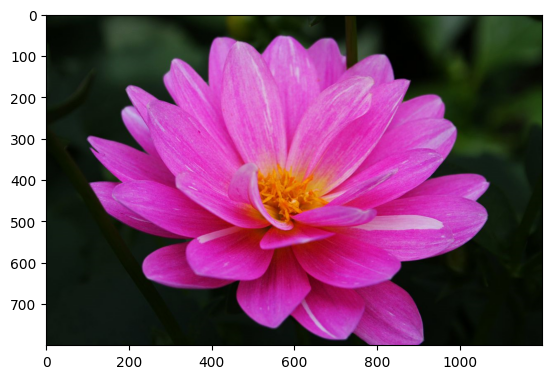

In [26]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [27]:
img.shape

(800, 1200, 3)

Разобъем изображение на цветовые каналы.

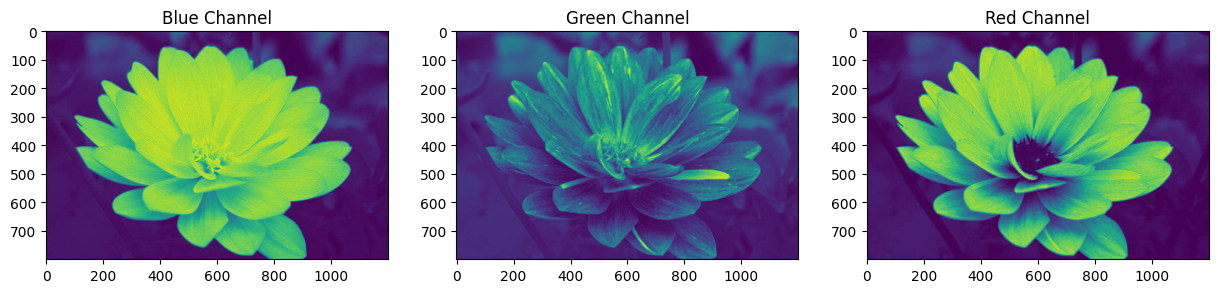

In [28]:
blue,green,red = cv2.split(img)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

Посмотрим на матрицу одного из каналов.

In [29]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,10,10,10,10,10,11,11,11,11,11,...,9,9,9,9,9,9,9,9,9,9
1,10,10,10,10,10,11,11,11,11,11,...,9,9,9,9,9,9,9,9,9,9
2,10,10,10,10,10,11,11,11,11,11,...,7,7,7,7,7,7,7,7,7,7
3,10,10,10,10,10,11,11,11,11,11,...,7,7,6,6,6,6,6,6,6,6
4,10,10,10,10,10,11,11,11,11,11,...,7,7,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,12,12,12,12,12,12,12,12,13,13,...,7,7,7,7,7,7,7,7,7,7
796,12,12,12,12,12,12,12,12,13,13,...,7,7,7,7,7,7,7,7,7,7
797,13,13,13,13,13,13,13,13,13,13,...,7,7,7,7,7,7,7,7,7,7
798,13,13,13,13,13,13,13,13,13,13,...,7,7,7,7,7,7,7,7,7,7


### Сейчас будем делать PCA

**Задание 4 (0.5 балла).** Масштабируйте данные, поделив значения в таблицах каждого канала на 255

In [30]:
# Поделим значения в таблице blue_temp_df
div_blue_temp_df = blue_temp_df / 255

# Поделим значения в таблице green_temp_df
green_temp_df = pd.DataFrame(data = green)
div_green_temp_df = green_temp_df / 255

# Поделим значения в таблице red_temp_df
red_temp_df = pd.DataFrame(data = red)
div_red_temp_df = red_temp_df / 255

**Задание 5 (1 балл).** Обучите PCA с 50-ю компонентами на каждом канале в отдельности (три раза обучаем). Снизьте размерность каждого канала в отдельности.

In [31]:
# blue channel
pca_blue = PCA(n_components=50)
pca_blue.fit(div_blue_temp_df)

# green channel
pca_green = PCA(n_components=50)
pca_green.fit(div_green_temp_df)

# red channel
pca_red = PCA(n_components=50)
pca_red.fit(div_red_temp_df)

PCA(n_components=50)

**Задание 6 (0.5 балла).** Выведите на экран долю дисперсии, объясняемой первыми 50-ю главными компонентами (для каждого канала в отдельности).

In [32]:
np.set_printoptions(suppress=True)

In [33]:
# blue channel
pca_blue.explained_variance_ratio_

array([0.54551371, 0.12226291, 0.08655246, 0.04622647, 0.03485279,
       0.02802763, 0.0198863 , 0.01507994, 0.01449318, 0.00876794,
       0.00850126, 0.00718821, 0.00691821, 0.00636299, 0.00451246,
       0.00377056, 0.0036578 , 0.00273263, 0.00244798, 0.00220964,
       0.00209865, 0.00170483, 0.00159743, 0.00149151, 0.00129735,
       0.00117341, 0.0011128 , 0.00107124, 0.00094531, 0.00092918,
       0.00077564, 0.00075887, 0.00069917, 0.00062123, 0.00059213,
       0.00058303, 0.00049949, 0.00048315, 0.00046738, 0.00043147,
       0.00041064, 0.00038274, 0.00037735, 0.00035419, 0.00035051,
       0.00034073, 0.00029286, 0.00028602, 0.00027859, 0.00026613])

In [34]:
# green channel
pca_green.explained_variance_ratio_

array([0.42202688, 0.12975336, 0.09141845, 0.05388477, 0.04181823,
       0.03264756, 0.02594657, 0.01795849, 0.01523537, 0.01509847,
       0.01160481, 0.01013609, 0.00947044, 0.00838655, 0.00659016,
       0.00602811, 0.00591313, 0.00529326, 0.00488307, 0.00421487,
       0.00400525, 0.0037298 , 0.00340203, 0.00327889, 0.00310775,
       0.00275384, 0.0025509 , 0.00247835, 0.00245297, 0.0021642 ,
       0.00199137, 0.00180432, 0.00176935, 0.00170346, 0.00166844,
       0.00157591, 0.00147551, 0.00144308, 0.0013972 , 0.00125192,
       0.00122995, 0.00122015, 0.00114526, 0.00111195, 0.00102985,
       0.00097382, 0.00096154, 0.0008907 , 0.00086785, 0.00084343])

In [35]:
# red channel
pca_red.explained_variance_ratio_

array([0.38291682, 0.2240533 , 0.08212321, 0.05657901, 0.03850272,
       0.03206777, 0.02629291, 0.02005234, 0.01819085, 0.01511522,
       0.01149071, 0.00988803, 0.00874224, 0.00718803, 0.00677955,
       0.0055613 , 0.00506353, 0.00369974, 0.00356475, 0.00322182,
       0.00259347, 0.00236419, 0.00222066, 0.00205697, 0.00186015,
       0.00165612, 0.00152828, 0.0013601 , 0.00127782, 0.00116092,
       0.00112803, 0.00094988, 0.00088391, 0.00084044, 0.00079366,
       0.00074268, 0.00065604, 0.00065017, 0.00061238, 0.00055195,
       0.00054054, 0.00050898, 0.00048368, 0.00045265, 0.00041877,
       0.00039758, 0.00039411, 0.0003723 , 0.00036664, 0.00033084])

**Задание 7 (0.5 балла).** Нарисуйте для каждого из трех каналов гистограмму, на которой отобразите долю дисперсии, объясняемой каждой из первых 50-ти компонент.

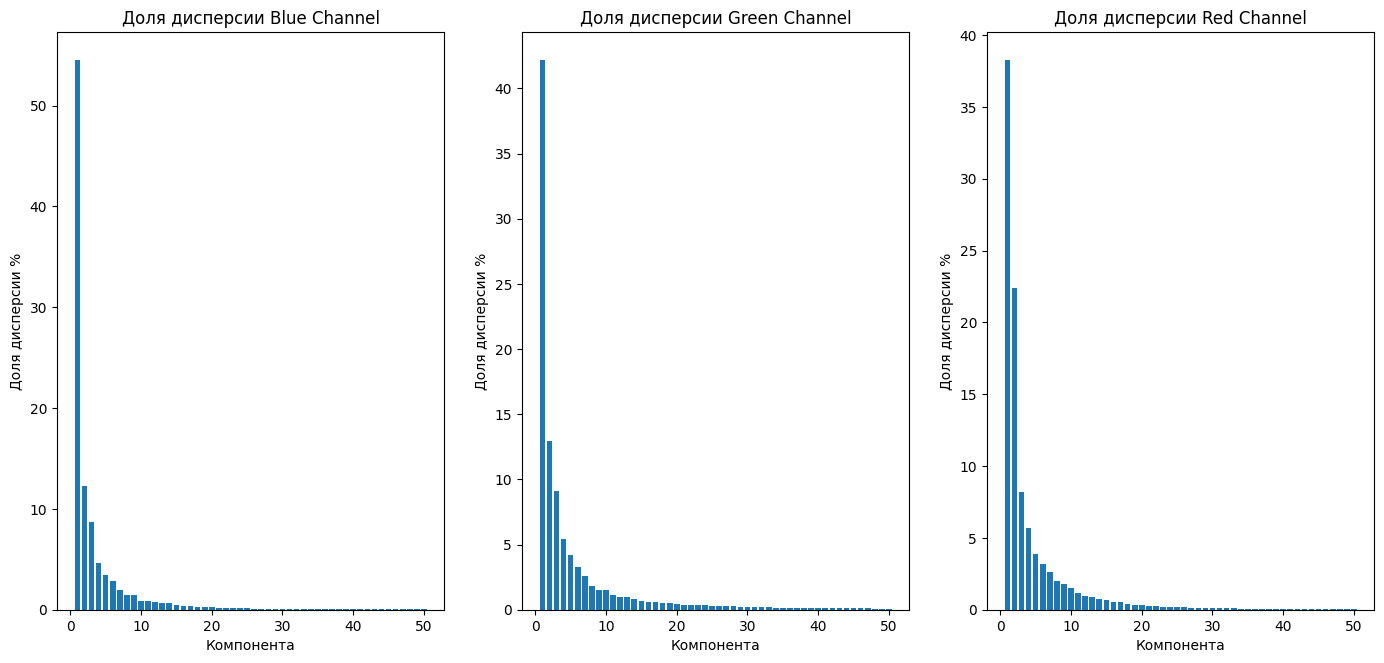

In [36]:
import matplotlib.pyplot as plt

x = np.arange(1, 51, 1)
fig = plt.figure(figsize=(17, 7.5))

fig.add_subplot(131)
plt.bar(x, pca_blue.explained_variance_ratio_ * 100)
plt.title('Доля дисперсии Blue Channel')
plt.xlabel('Компонента')
plt.ylabel('Доля дисперсии %')

fig.add_subplot(132)
plt.bar(x, pca_green.explained_variance_ratio_ * 100)
plt.title('Доля дисперсии Green Channel')
plt.xlabel('Компонента')
plt.ylabel('Доля дисперсии %')


fig.add_subplot(133)
plt.bar(x, pca_red.explained_variance_ratio_ * 100)
plt.title('Доля дисперсии Red Channel')
plt.xlabel('Компонента')
plt.ylabel('Доля дисперсии %')

plt.show()

### Восстанавливаем изображение

**Задание 8 (1 балл).** Восстановите изображения по каждому каналу в отдельности, используя pca.inverse_transform.

In [37]:
# Восстановим изображения

# blue channel
img_transform_blue = pca_blue.fit_transform(div_blue_temp_df)
img_inverse_blue = pca_blue.inverse_transform(img_transform_blue)

# green channel
img_transform_green = pca_green.fit_transform(div_green_temp_df)
img_inverse_green = pca_green.inverse_transform(img_transform_green)

# red channel
img_transform_red = pca_red.fit_transform(div_red_temp_df)
img_inverse_red = pca_red.inverse_transform(img_transform_red)

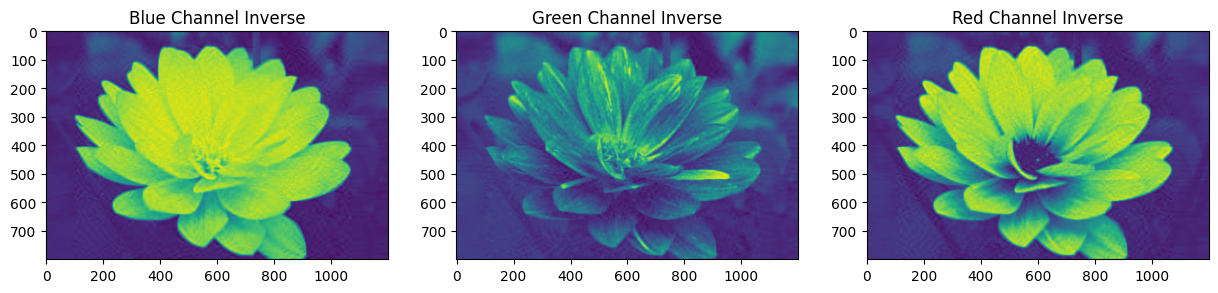

In [38]:
# Восстановленные изображения по каждому каналу
fig = plt.figure(figsize = (15, 7.2))

fig.add_subplot(131)
plt.title("Blue Channel Inverse")
plt.imshow(img_inverse_blue)

fig.add_subplot(132)
plt.title("Green Channel Inverse")
plt.imshow(img_inverse_green)

fig.add_subplot(133)
plt.title("Red Channel Inverse")
plt.imshow(img_inverse_red)

**Задание 9 (0.5 балла).** Склейте восстановленные одноканальные изображения в цветное трехканальное изображение. Вы получите сжатое изображение

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


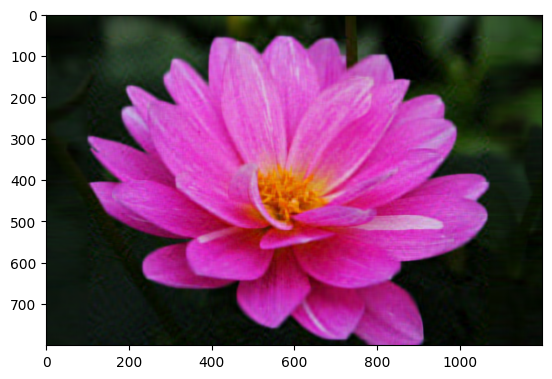

In [39]:
img_merged = (cv2.merge((img_inverse_blue, img_inverse_green, img_inverse_red)))
plt.imshow(img_merged)

**Задание 10 (1 балл).** Нарисуйте рядом два изображения: исходное и восстановленное (по своим 50 компонентам). Прокомментируйте текстом результат - упало ли визуально качество при сжатии изображения до 50 главных компонент?

Да, качество изображения визуально упало.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


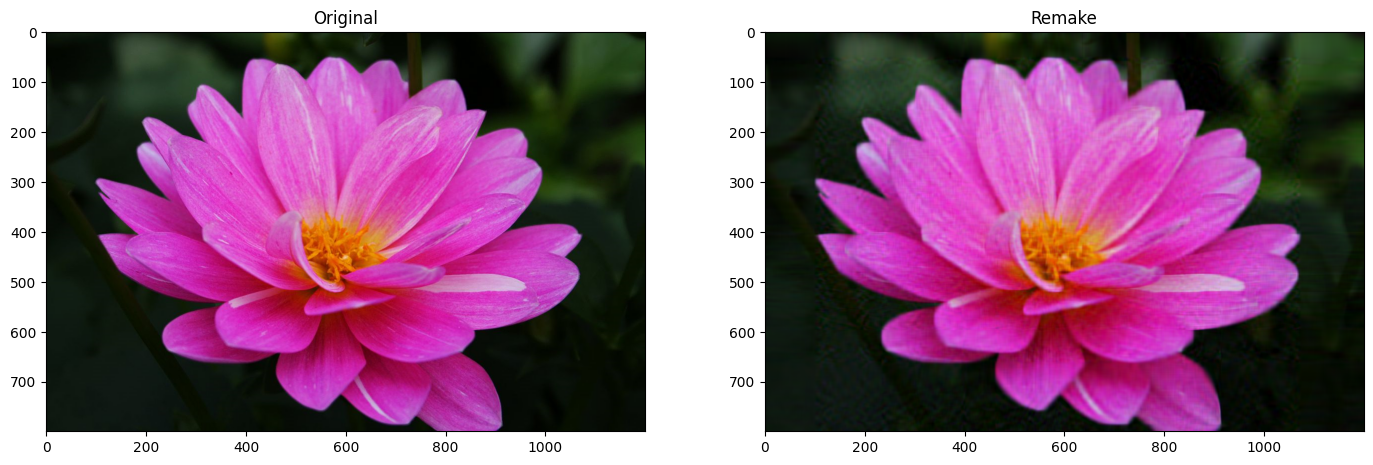

In [40]:
fig = plt.figure(figsize = (17, 15))
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)

fig.add_subplot(121)
plt.title("Original")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Remake")
plt.imshow(img_merged)

plt.show()

**Задание 11 (1 балл).** Подберите минимальное количество компонент, при которых сжатое изображение визуально не отличается от исходного. Подбор происходит перебором, ориентируемся на визуальный результат.

При 140 компонентах визуальный результат не отличается от оригинала.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


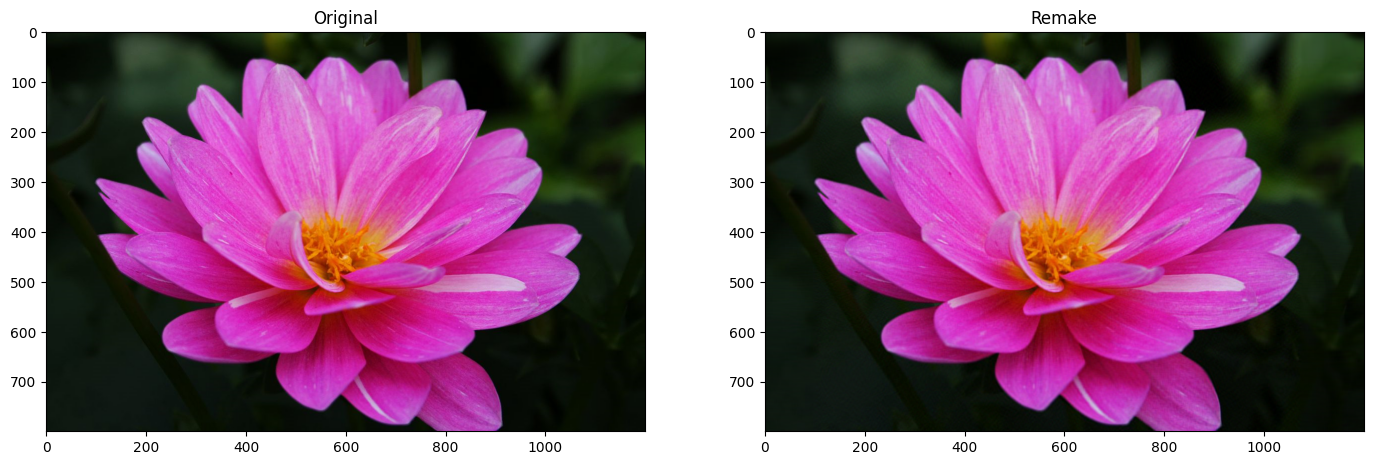

In [41]:
# Обучим pca на 140 компонентах

# blue channel
pca_blue = PCA(n_components=140)
pca_blue.fit(div_blue_temp_df)

# green channel
pca_green = PCA(n_components=140)
pca_green.fit(div_green_temp_df)

# red channel
pca_red = PCA(n_components=140)
pca_red.fit(div_red_temp_df)

# Восстановим изображения
# blue channel
img_transform_blue = pca_blue.fit_transform(div_blue_temp_df)
img_inverse_blue = pca_blue.inverse_transform(img_transform_blue)

# green channel
img_transform_green = pca_green.fit_transform(div_green_temp_df)
img_inverse_green = pca_green.inverse_transform(img_transform_green)

# red channel
img_transform_red = pca_red.fit_transform(div_red_temp_df)
img_inverse_red = pca_red.inverse_transform(img_transform_red)


img_merged = (cv2.merge((img_inverse_blue, img_inverse_green, img_inverse_red)))
fig = plt.figure(figsize = (17, 15))
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)

fig.add_subplot(121)
plt.title("Original")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Remake")
plt.imshow(img_merged)

plt.show()